# Reproducibility_Challenge_NeurIPS_2019

This is a blog explains method proposed in the paper Competitive gradient descent [(Schäfer et al., 2019)](https://arxiv.org/abs/1905.12103). This has been written as a supplimentary to the reproducibility report for reproducibility challenge of NeurlIPS’19. The pdf format of the report is present [here](https://gopikishan14.github.io/Reproducibility_Challenge_NeurIPS_2019/) with this github [repository](https://github.com/GopiKishan14/Reproducibility_Challenge_NeurIPS_2019) as its source.

# Paper Overview
The paper introduces a new algorithm for the numerical computation of Nash equilibria of competitive two-player games. The method is a natural generalization of gradient descent to the two-player setting where the update is given by the Nash equilibrium of a regularized bilinear local approximation of the underlying game. It avoids oscillatory and divergent behaviors seen in alternating gradient descent. Convergence and stability properties of the method are robust to strong interactions between the players, without adapting the stepsize, which is not the case with previous methods. The ability to choose larger stepsizes furthermore allows the algorithm to achieve faster convergence, as measured by the number of model evaluations (See the [report](https://gopikishan14.github.io/Reproducibility_Challenge_NeurIPS_2019/) experiments section).


## Background
The traditional optimization is concerned with a single agent trying to optimize a cost function. It
can be seen as $\min_{x \in R^m} f(x)$ . The agent has a clear objective to find (“Good local”) minimum of
f. Gradeint Descent (and its varients) are reliable Algorithmic Baseline for this purpose.

The paper talks about Competitive optimization. Competitive optimization extends this problem
to the setting of multiple agents each trying to minimize their own cost function, which in general
depends on the actions of all agents.
 The paper deals with the case of two such agents:
    \begin{align}
        &\min_{x \in R^m} f(x,y),\ \ \ \min_{y \in R^n} g(x,y)
    \end{align}
    for two functions $f,g: R^m \times R^n \longrightarrow R$.

In single agent optimization, the solution of the problem consists of the minimizer of the cost function.
In competitive optimization, the right definition of solution is less obvious, but often one is
interested in computing Nash– or strategic equilibria: Pairs of strategies, such that no player can
decrease their costs by unilaterally changing their strategies. If f and g are not convex, finding a
global Nash equilibrium is typically impossible and instead we hope to find a "good" local Nash
equilibrium

## About the problem
##### Gradient descent/ascent and the cycling problem:

For differentiable objective functions, the most naive approach to solving
\begin{align}
        \label{eqn:game}
        &\min_{x \in R^m} f(x,y),\ \ \ \min_{y \in R^n} g(x,y)
    \end{align}
is gradient descent ascent (GDA), whereby both players independently change their strategy in the direction of steepest descent of their cost function.
Unfortunately, this procedure features oscillatory or divergent behavior even in the simple case of a bilinear game ($f(x,y) = x^{\top} y = -g(x,y)$)



## Solution approach

To motivate this algorithm, authors remind us that gradient descent with stepsize $\eta$ applied to the function $f:R^m \longrightarrow R$ can be written as

\begin{equation}
        x_{k+1} = argmin_{x \in R^m} (x^T - x_{k}^T) \nabla_x f(x_k) + \frac{1}{2\eta} \|x - x_{k}\|^2.
    \end{equation}

This models a (single) player solving a local linear approximation of the (minimization) game, subject to a quadratic penalty that expresses her limited confidence in the global accuracy of the model. 

```The natural generalization of this idea to the competitive case should then be given by the two players solving a local approximation of the true game, both subject to a quadratic penalty that expresses their limited confidence in the accuracy of the local approximation.```

In order to implement this idea, we need to find the appropriate way to generalize the linear approximation in the single agent setting to the competitive setting. 

Authors suggest to use a **bilinear** approximation in the two-player setting.
Since the bilinear approximation is the lowest order approximation that can capture some interaction between the two players, they argue that the natural generalization of gradient descent to competitive optimization is not GDA, but rather the update rule $(x_{k+1},y_{k+1}) = (x_k,y_k) + (x,y)$, where $(x,y)$ is a Nash equilibrium of **the game**.

\begin{align}
    \begin{split}
    \label{eqn:localgame}
    \min_{x \in R^m} x^{\top} \nabla_x f &+ x^{\top} D_{xy}^2 f y + y^{\top} \nabla_y f + \frac{1}{2\eta} x^{\top} x \\
    \min_{y \in R^n}  y^{\top} \nabla_y g &+ y^{\top} D_{yx}^2 g x + x^{\top} \nabla_x g + \frac{1}{2\eta} y^{\top} y.
    \end{split}
\end{align}

Indeed, the (unique) Nash equilibrium of the above Game can be computed in closed form.


## Proposed method
**Among all (possibly randomized) strategies with finite first moment, the only Nash equilibrium of `the Game` is given by
\begin{align}
\label{eqn:nash}
&x = -\eta \left( Id - \eta^2 D_{xy}^2f D_{yx}^2 g \right)^{-1}  
            \left( \nabla_{x} f - \eta D_{xy}^2f  \nabla_{y} g \right) \\
&y = -\eta \left( Id - \eta^2 D_{yx}^2g D_{xy}^2 f \right)^{-1}  
            \left( \nabla_{y} g - \eta D_{yx}^2g  \nabla_{x} f \right),
\end{align}
given that the matrix inverses in the above expression exist.** 

Note that the matrix inverses exist for all but one value of $\eta$, and for all $\eta$ in the case of a zero sum game.

According to the above Theorem, the Game has exactly one optimal pair of strategies, which is deter-ministic. Thus, we can use these strategies as an update rule, generalizing the idea of local optimalityfrom the single– to the multi agent setting and obtaining the following Algorithm.

`Competitive Gradient Descent (CGD)`
\begin{align}
for\ (0 <= k <= N-1)\\
&x_{k+1}  = x_{k} - \eta \left( Id - \eta^2 D_{xy}^2f D_{yx}^2 g \right)^{-1}\left( \nabla_{x} f - \eta D_{xy}^2f  \nabla_{y} g \right)\\
&y_{k+1} = y_{k} - \eta \left( Id - \eta^2 D_{yx}^2g D_{xy}^2 f \right)^{-1}  
    \left( \nabla_{y} g - \eta D_{yx}^2g  \nabla_{x} f \right)\\
    return\ (x_{N},y_{N})\;
\end{align}




**What I think that they think that I think ... that they do**: Another game-theoretic interpretation of CGD follows from the observation that its update rule can be written as 

\begin{equation}
\begin{pmatrix}
     \Delta x\\
     \Delta y
\end{pmatrix} = -
\begin{pmatrix}
    Id        & \eta D_{xy}^2 f \\
    \eta D_{yx}^2 g & Id        
\end{pmatrix}^{-1}
\begin{pmatrix}
     \nabla_{x} f\\
     \nabla_{y} g
\end{pmatrix}.
\end{equation}

Applying the expansion $ \lambda_{\max} (A) < 1 \Rightarrow \left( Id - A \right)^{-1} = \lim_{N \rightarrow \infty} \sum_{k=0}^{N} A^k$ to the above equation, we observe that: \\

1. The first partial sum ($N = 0$) corresponds to the optimal strategy if the other player's strategy stays constant (GDA).
2. The second partial sum ($N = 1$) corresponds to the optimal strategy if the other player thinks that the other player's strategy stays constant (LCGD).
3. The third partial sum ($N = 2$) corresponds to the optimal strategy if the other player thinks that the other player thinks that the other player's strategy stays constant, and so forth, until the Nash equilibrium is recovered in the limit.




## Comparison
These six algorithms amount to different subsets of the following four terms.

\begin{align*}
       & \text{GDA: } &\Delta x =  &&&- \nabla_x f&\\
       & \text{LCGD: } &\Delta x =  &&&- \nabla_x f& &-\eta D_{xy}^2 f \nabla_y f&\\
       & \text{SGA: } &\Delta x =  &&&- \nabla_x f& &- \gamma D_{xy}^2 f \nabla_y f&  & & \\
       & \text{ConOpt: } &\Delta x =  &&&- \nabla_x f& &- \gamma D_{xy}^2 f \nabla_y f&  &- \gamma D_{xx}^2 f \nabla_x f& \\
       & \text{OGDA: } &\Delta x \approx &&&- \nabla_x f& &-\eta D_{xy}^2 f \nabla_y f&  &+\eta D_{xx}^2 f \nabla_x f& \\
       & \text{CGD: } &\Delta x = &\left(Id + \eta^2 D_{xy}^2 f D_{yx}^2 f\right)^{-1}&\bigl( &- \nabla_x f&  &-\eta D_{xy}^2 f \nabla_y f& & & \bigr)
     \end{align*}

1. The **gradient term** $-\nabla_{x}f$, $\nabla_{y}f$ which corresponds to the most immediate way in which the players can improve their cost.



2. The **competitive term** $-D_{xy}f \nabla_yf$, $D_{yx}f \nabla_x f$ which can be interpreted either as anticipating the other player to use the naive (GDA) strategy, or as decreasing the other players influence (by decreasing their gradient).



3. The **consensus term** $ \pm D_{xx}^2 \nabla_x f$, $\mp D_{yy}^2 \nabla_y f$ that determines whether the players prefer to decrease their gradient ($\pm = +$) or to increase it ($\pm = -$). The former corresponds the players seeking consensus, whereas the latter can be seen as the opposite of consensus. (It also corresponds to an approximate Newton's method. \footnote{Applying a damped and regularized Newton's method to the optimization problem of Player 1 would amount to choosing $x_{k+1} = x_{k} - \eta(Id + \eta D_{xx}^2)^{-1} f \nabla_x f \approx x_{k} - \eta( \nabla_xf - \eta D_{xx}^{2}f \nabla_x f)$, for $\|\eta D_{xx}^2f\| \ll 1$.)




4. The **equilibrium term** $(Id + \eta^2 D_{xy}^2 D_{yx}^2 f)^{-1}$, $(Id + \eta^2 D_{yx}^2 D_{xy}^2 f)^{-1}$, which arises from the players solving for the Nash equilibrium. 
    This term lets each player prefer strategies that are less vulnerable to the actions of the other player.


## Code Implementation

The competitive gradeint descent algorithm contains gradient, competitive and equilibrium term. So, we need to efficiently calculat them. The equibrium term is a matrix inverse

### Computing Hessian vector products

The algorithm requires products of the mixed Hessian $v \mapsto D_{xy}f v$ and  $v \mapsto D_{yx}g v$, which we want to compute using automatic differentiation.

Many AD frameworks, like Autograd (https://github.com/HIPS/autograd) and ForwardDiff(https://github.com/JuliaDiff/ForwardDiff.jl) together with ReverseDiff(https://github.com/JuliaDiff/ReverseDiff.jl) support this procedure. While the authors used the AD frameworks from Julia, I will be using Autograd from PyTorch (https://pytorch.org/docs/stable/autograd.html)

### Matrix inversion for the equilibrium term
Authors propose to use iterative methods to approximate the inverse-matrix vector products arising in the *equilibrium term*.
Authors focus on zero-sum games, where the matrix is always symmetric positive definite, making the [conjugate gradient (CG)](https://en.wikipedia.org/wiki/Conjugate_gradient_method) algorithm the method of choice. 
They also suggest terminating the iterative solver after a given relative decrease of the residual is achieved ($\| M x - y \| \leq \epsilon \|x\|$ for a small parameter $\epsilon$, when solving the system $Mx = y$).

Briefly, conjugate gradient (CG) iteratively solves the system $Mx = y$ for $x$ without calculating $M^{-1}$.

Solution vector x* for Ax = b :
[[ 2.]
 [-2.]]
And the steps taken by algorithm :  [(-2.0, -2.0), (0.08000000000000007, -0.6133333333333333), (2.0, -2.0)]


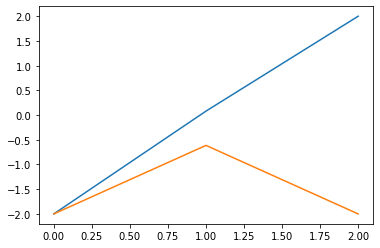

In [14]:
import numpy as np
import matplotlib.pyplot as plt
"""
Simple python implemetation of CG tested on an example
"""

# Problem setup
A = np.matrix([[3.0, 2.0], 
               [2.0, 6.0]]) # the matrix A in : Ax = b
b = np.matrix([[2.0], 
               [-8.0]])  # we will use the convention that a vector is a column vector


# solution approach
x = np.matrix([[-2.0],
               [-2.0]])

steps = [(-2.0, -2.0)]  # modify according to x
i = 0
imax = 10
eps = 0.01
r = b - A * x
d = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(d.T * (A * d)))
    x = x + alpha * d
    steps.append((x[0, 0], x[1, 0]))
    r = b - A * x
    deltaold = deltanew
    deltanew = r.T * r
    beta = float(deltanew / float(deltaold))
    d = r + beta * d
    i += 1
    
print("Solution vector x* for Ax = b :")
print(x)

print("And the steps taken by algorithm : ", steps)
plt.plot(steps)

#### Now to solve our problem of CGD, the following equation

\begin{equation}
\begin{pmatrix}
     \Delta x\\
     \Delta y
\end{pmatrix} = -
\begin{pmatrix}
    Id        & \eta D_{xy}^2 f \\
    \eta D_{yx}^2 g & Id        
\end{pmatrix}^{-1}
\begin{pmatrix}
     \nabla_{x} f\\
     \nabla_{y} g
\end{pmatrix}.
\end{equation}

#### can be written as 

\begin{equation}
\begin{pmatrix}
    Id        & \eta D_{xy}^2 f \\
    \eta D_{yx}^2 g & Id        
\end{pmatrix}
\begin{pmatrix}
     \Delta x\\
     \Delta y
\end{pmatrix} = -
\begin{pmatrix}
     \nabla_{x} f\\
     \nabla_{y} g
\end{pmatrix}.
\end{equation}

#### so that the conjugate gradient method can used to calculate $\Delta x$ and $\Delta y$ without inverting the matrix.


## Conclusion

In the words of the authors of original paper,
`We propose a novel and natural generalization of gradient descent to competitive optimization. Besides its attractive game-theoretic interpretation, the algorithm shows improved robustness properties compared to the existing methods, which we study using a combination of theoretical analysis and computational experiments.`

Look out to the conclusion section of the [paper](https://arxiv.org/pdf/1905.12103.pdf) for extensive conclusion and future aspects.
Refers to the Experiment and Conclusion section of the reproducibility [report](https://gopikishan14.github.io/Reproducibility_Challenge_NeurIPS_2019/index.html) for details on replication.